EL objetivo de este notebook es entrenar un modelo con deeplearning que aprenda a identificar los puntos clave (keypoints) en una imagen. 
Pasos: 

1) Explorar los datos y reporoducirlos, entender su estructura. 

2) Experimentar posibles modelos. Y elegir el más apropiado tomando en cuenta que es una gran cantidad de imagene. Pueden ser utiles usar la matriz de confusion, el accuracy, la curva de elbow, etc. 



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.pyplot import imshow
import tensorflow as tf

Primera Parte: Exploración de Datos

In [20]:
#abro los archivos csv con los datos
df_train=pd.read_csv('training.csv') #aqui hay coordenadas de los keypoints Hay 15 coordenadas (es decir, 30 valores). El valor 31 es la imagen. 
df_test=pd.read_csv('test.csv') #imageId, Image
df_test

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


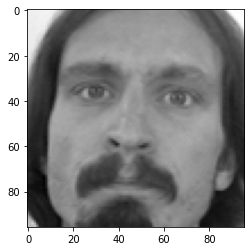

In [21]:
#Ver la imagen numero imagenes[n]
n=0
imagen=df_train.values[n][30].split()
im_array = np.int8(np.reshape(imagen, (96, 96)))
img = Image.fromarray(im_array, 'L')
imshow(np.asarray(img), cmap='gray')

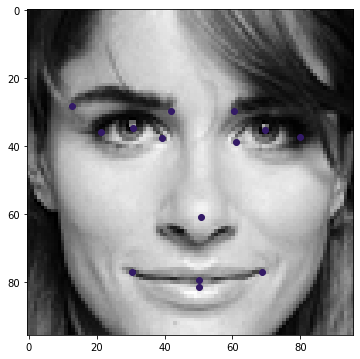

In [22]:
n=1598 ##n es el numero de imagen que quiero plotear
imagen=df_train.values[n][30].split()
im_array = np.int8(np.reshape(imagen, (96, 96)))
#Saco los keypoints del  (intente sacar todos en una lista, pero es bastante el procesamiento así que saco solo el que necesito)
#df_train.values[n][2] #[Numero de imagen][coordenada de punto]
#df_train.columns
xcoord=[]
ycoord=[]
for i in range(15): #15 es la cantidad de keypoints
    xcoord.append(df_train.values[n][2*i]) #aca guardo las coordenadas x que son las pares en el data frame
    ycoord.append(df_train.values[n][2*i+1]) #y aqui las y que son impares

#Ahora ploteo 
fig =plt.subplots(figsize=(6,6))
img = Image.fromarray(im_array, 'L')
plt.plot(xcoord,ycoord,'o',linewidth=1,color=(0.2,0.1,0.4))
imshow(np.asarray(img), cmap='gray')



Segunda Parte: Deep Learning para entrenar un modelo que reconozca los keypoints
2.1 Entrenamiento
2.2 Testing
2.3 Evaluación de calidad del modelo


In [23]:
def funcion_generadora(ristra_de_cajas):
    for caja in ristra_de_cajas:
        if caja == "BLANCO":
            yield "AZUL"
        elif caja == "ROJO":
            yield "MORADO"
        else:
            yield caja

In [24]:
ristra_de_cajas = ["BLANCO", "ROJO", "NEGRO"]

generador = funcion_generadora(ristra_de_cajas)

for caja_pintada in generador:
    print(caja_pintada)

AZUL
MORADO
NEGRO


In [25]:
a=[3, 5, 8]
max(a)

8

In [26]:
def funcion_generadora(imagenes_de_training): 
    for fotografia in range(len(imagenes_de_training)):
        foto = imagenes_de_training[fotografia][30].split()
        yield foto

In [27]:
len(df_train.values[0])

31

In [43]:
imagenes_train=df_train.values
generador = funcion_generadora(imagenes_train)
for fotografia in generador: 
    print(len(fotografia))

9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216
9216


In [ ]:
imagenes_train=df_train.values
generador = funcion_generadora(imagenes_train)
for fotografia in generador: 
    im_array = np.int8(np.reshape(fotografia, (96, 96)))
    img = Image.fromarray(im_array, 'L')
    imshow(np.asarray(img), cmap='gray')

In [31]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [32]:
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

In [33]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
IdLookupTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowId        27124 non-null  int64  
 1   ImageId      27124 non-null  int64  
 2   FeatureName  27124 non-null  object 
 3   Location     0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


In [34]:
IdLookupTable.head()


,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [5]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   RowId     27124 non-null  int64
 1   Location  27124 non-null  int64
dtypes: int64(2)
memory usage: 423.9 KB


In [35]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [7]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [8]:
training = pd.read_csv('training.csv')


In [41]:
training = training.dropna()
#training.fillna(method = 'ffill',inplace = True)
training.shape, type(training)

##Me falta entender que significa shape y dropna!!!!

((2140, 31), pandas.core.frame.DataFrame)

In [42]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

ValueError: cannot reshape array of size 0 into shape (96,96)

In [38]:
def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

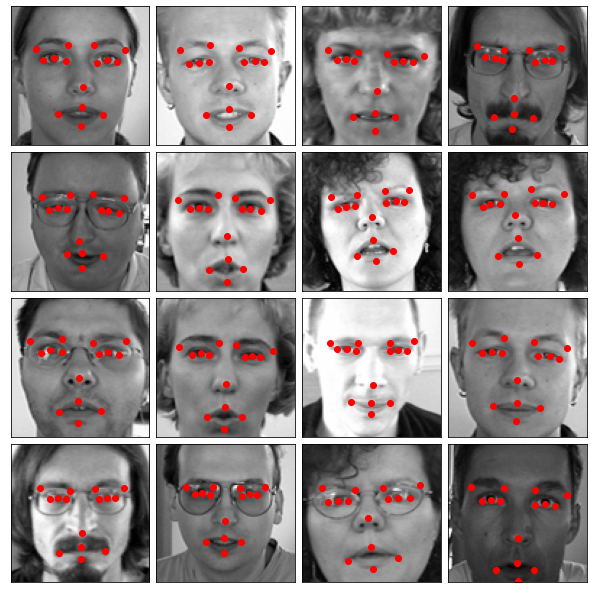

In [39]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i+523)

plt.show()

In [40]:
X = np.asarray([training['Image']], dtype=np.uint8, order=order).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1)

NameError: name 'order' is not defined

In [9]:
import cv2 as cv
import imageio
import os
from matplotlib.pyplot import imshow

In [17]:
cerveza=imageio.imread('beer.png')
cerveza1=imageio.imread('beer1.jpg')

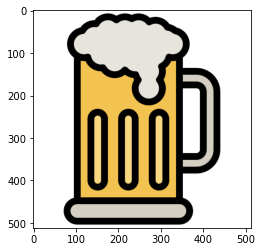

In [11]:
imshow(cerveza)

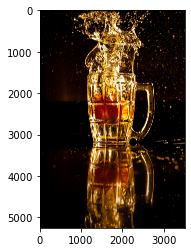

In [12]:
imshow(cerveza1)

In [31]:
#posicion de la cerveza 
pc= {
    'x':20, 'y':20,
    'w':200, 'h':200
}
pc1 = {
    'x':20, 'y':20,
    'w':200, 'h':200
}

In [32]:
cerveza=cv.resize(cerveza,(pc['w'], pc['h']))
cerveza1=cv.resize(cerveza1,(pc1['w'], pc1['h']))

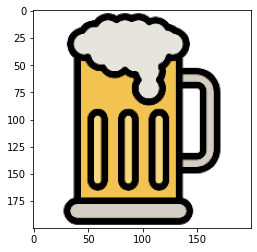

In [34]:
imshow(cerveza)

In [36]:
cap=cv.VideoCapture(0)

In [ ]:
while True:
    red, img=read()
    img= cv.flip( img,1)
    img[
        pc['y']:pc['y']+pc['h']
    ]

In [18]:
a=[1,2,3,4,5,6,7]

In [21]:
a[0:] #es un slicy al estilo for loop

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
a[0:-1:2]  #star :end :step

In [ ]:
for (int i=0; i< len(arr), i+=1)